In [1]:
import os
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:

# Konfiguracja MLflow
mlflow.set_tracking_uri("file:///home/jovyan/mlruns")
mlflow.set_experiment("EXPERIMENT")

2025/06/05 19:20:31 INFO mlflow.tracking.fluent: Experiment with name 'EXPERIMENT' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///home/jovyan/mlruns/320913890746437937', creation_time=1749151231634, experiment_id='320913890746437937', last_update_time=1749151231634, lifecycle_stage='active', name='EXPERIMENT', tags={}>

In [3]:
# Dane
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [4]:
# Parametr (możemy go zmieniać i porównywać)
test_size = 0.25
random_state = 42

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

2025/06/05 19:20:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Eksperyment zakończony. Wszystko zalogowano do MLflow.


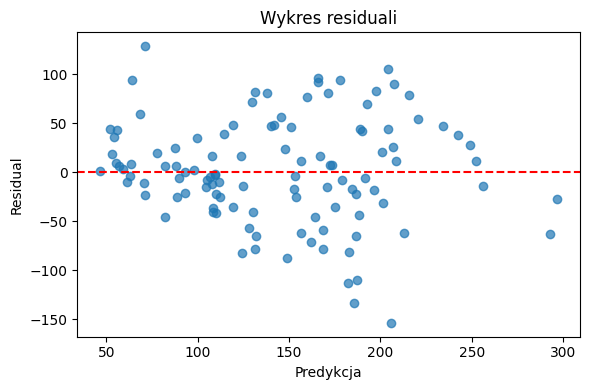

In [6]:
# Start run
with mlflow.start_run():

    # Loguj parametry
    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_param("test_size", test_size)
    mlflow.log_param("random_state", random_state)

    # Model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metryki
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)

    # Loguj model
    mlflow.sklearn.log_model(model, "model")

    # Wykres residuali jako artefakt
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Predykcja")
    plt.ylabel("Residual")
    plt.title("Wykres residuali")
    plot_path = "residuals.png"
    plt.tight_layout()
    plt.savefig(plot_path)
    mlflow.log_artifact(plot_path)

    print("Eksperyment zakończony. Wszystko zalogowano do MLflow.")